# Decision Tree Banknotes Dataset

In [49]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd

In [50]:
RANDOM_SEED = 9
DATASPLIT = 0.3

In [ ]:
dataset = fetch_ucirepo(id=267)

df = pd.DataFrame(dataset.data.features)
df['class'] = dataset.data.targets

df = df.replace("?", pd.NA).dropna()
df = df.astype(float)

print(df.describe())

data = df.drop(columns=['class'])
labels = df['class']

data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=DATASPLIT, random_state=RANDOM_SEED)
data_train, data_val, label_train, label_val = train_test_split(data_train, label_train, test_size=DATASPLIT, random_state=RANDOM_SEED)

print(f"Train dataset length: {len(data_train)}, Validation dataset length: {len(data_val)}, Test dataset length: {len(data_test)}")


          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Train dataset length: 672, Validation dataset length: 288, Test dataset length: 412


In [52]:
parameters = {
    'max_depth': range(3,20)
}

clf = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_SEED), parameters, verbose=1)

clf.fit(data_val, label_val)

model = clf.best_estimator_
print("Best cross-validation score: ", clf.best_score_)
print("With parameters: ", clf.best_params_)

print("Training model with best parameters")
model.fit(data_train, label_train)

accuracy = model.score(data_test, label_test)
print("Accuracy: ", accuracy)

predictions = model.predict(data_test)
f1 = f1_score(label_test, predictions, average='weighted')

print("F1 score: ", f1)



Fitting 5 folds for each of 17 candidates, totalling 85 fits
Best cross-validation score:  0.9549304295220811
With parameters:  {'max_depth': 5}
Training model with best parameters
Accuracy:  0.9733009708737864
F1 score:  0.9732599015431632


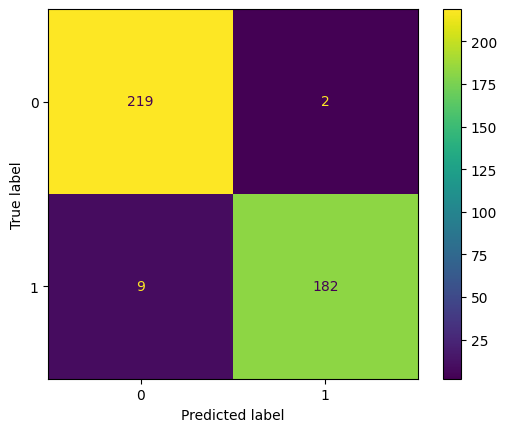

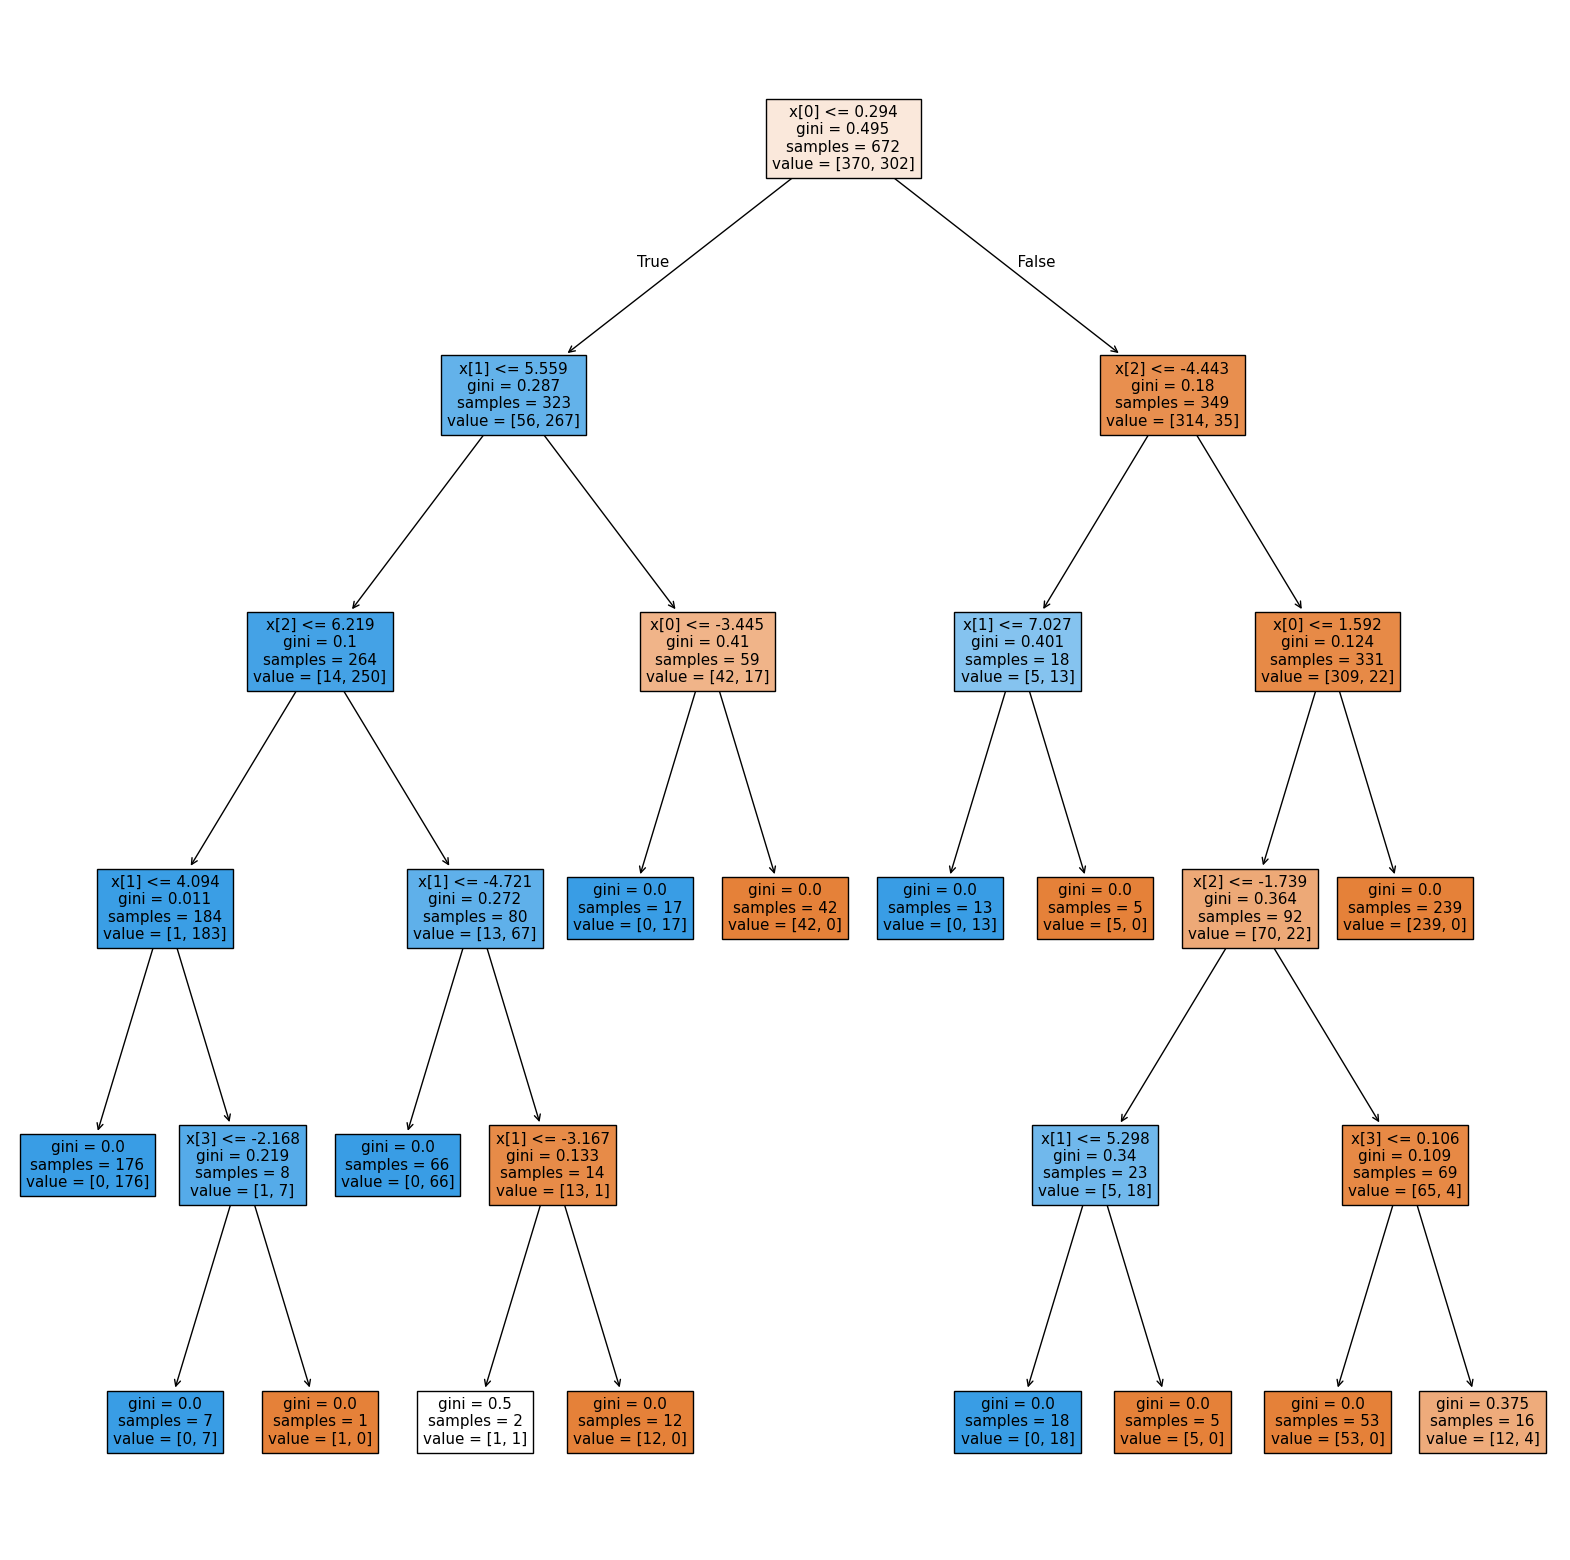

In [53]:
cm = confusion_matrix(label_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.data.target_names)
disp.plot()
plt.show()

plt.figure(figsize=(20,20))
plot_tree(model, filled=True, feature_names=dataset.feature_names, class_names=dataset.data.target_names)
plt.show()